# Exploration of H-1B Visa Petition Data 
### PSYC 81.09 Final Project
#### May 29, 2019
#### Athina Schmidt and Sonia Rowley


## Introduction
Only weeks ago, Trump announced a "comprehensive 
merit-based” immigration plan, which will allocate more visas to skilled immigrants and fewer visas to applicants with family ties in the U.S. With the 2020 election looming, President Trump has been shifting his focus toward an overhaul of the legal immigration system for months. On January 11, 2019, he tweeted:

"H1-B holders in the United States can rest assured that changes are soon coming which will bring both simplicity and certainty to your stay, including a potential path to citizenship. We want to encourage talented and highly skilled people to pursue career options in the U.S."

Just under three months later, in April 2019, a policy brief from the National Foundation for American Policy (NAFP) cited increasing denial rates for H-1B petitions since Trump came into office. H-1B visas are commonly-used work visas that allow American companies to sponsor and employ highly-skilled foreign nationals in the U.S. The NAFP, a non-profit non-partisan organization, concluded:

“If the goal of the Trump administration is to make it much more difficult for well-educated foreign nationals to work in America in technical fields, then USCIS is accomplishing that goal. Whether the actions of USCIS are serving the best interests of the United States is a question that will remain open for debate.” (NFAP Policy Brief, April 2019)

While we won’t know the impact of Trump’s proposed changes to the H-1B approval process until 2020, the NAFP policy brief would suggest that the process is already changing, and not in the direction that Trump’s tweet promises.

Immigration is a convoluted and politically fraught topic. In this project, we shed light on a small slice of the legal immigration puzzle: H-1B petitions. We investigate data from the US Department of Labor and US Citizen and Immigration Services (USCIS) to describe the pool of H-1B applicants and visualize trends in H-1B petition approvals over time. 

### Before we begin… what is an H-1B visa and how do you get one?

An H-1B visa is a nonimmigrant visa available only to foreign workers in “specialty occupations.” Applicants for these visas must hold a BA or higher and they must be sponsored by a US company that has offered them a job. Many international students at US colleges, like Dartmouth, seek these work visas after graduation as their only option to remain in the US legally.  

The application is an expensive, complex, multi-step process. For the sake of understanding our project, you only need to understand a few key points. 

After the employer has offered the applicant a job, the employer FIRST submits a Labor Conditions Approval application to the Department of Labor, to make sure the terms of the employment meet legal labor conditions. Most applications are approved during this initial phase. In the first half of this project, we examine an LCA application dataset from the Department of Labor for 2018. 

After the LCA has been approved, the employer submits a (36-page!) form to US Citizenship and Immigration Services (USCIS), which has jurisdiction over final adjudication of the application. USCIS selects which applications to adjudicate based on a random lottery system since there are more applications recieved than visas available. Our second dataset uses USCIS data on H-1B petitions from 2012-2019.

We will analyze two types of approvals and denials: “initial” and “continuing.” This terminology is defined by the USCIS as follows:

* **Initial** = H-1B petitions with “New employment” or “New concurrent employment” selected on Form 1-129. This initial visa lasts for 3 years, and after that time is up, employees may apply to extend their visa.
* **Continuing** = H-1B petitions with anything other than “New employment” or “New concurrent employment” selected on Form I-129. This includes, for example, continuing employment, change of employer, and amended petitions. 


## Overview / Datasets

In our first set of data explorations, we explore the 2018 LCA application dataset from the US Department of Labor. This dataset includes the most extensive information about each petition, including employer name, job title, and prevailing wages (i.e. typical wage for the position in question within a particular geographic area). We calculate the 2018 LCA approval rate. We then describe the population of applicants for H-1Bs, visualizing the top employer sponsors and most common job titles. We also compare the prevailing wages of common job titles. 

* **Dataset name in GitHub:** `2018.CSV`
* **Source:** U.S Department of Labor Office of Foreign Labor Certification, Labor Condition Application Data Set for 2018: https://www.foreignlaborcert.doleta.gov/performancedata.cfm (Go to “Disclosure Data” tab and scroll down to “LCA Programs”).

In our second set of data explorations, we explore the 2012-2019 datasets from the USCIS H-1B Employer Data Hub. The 2019 dataset includes only data from the first quarter of fiscal year 2019. This data hub was only recently launched, on April 1, 2019, and it includes information about the approval statuses of all the petitions that passed the LCA phase and were submitted to the USCIS. With this data, we visualize trends in approval and denial rates over time. We also visualize trends in absolute number of petitions submitted over time.

* **Datasets in GitHub**
    * `h1b_datahubexport-2012.csv`
    * `h1b_datahubexport-2013.csv`
    * `h1b_datahubexport-2014.csv`
    * `h1b_datahubexport-2015.csv`
    * `h1b_datahubexport-2016.csv`
    * `h1b_datahubexport-2017.csv`
    * `h1b_datahubexport-2018.csv`
    * `h1b_datahubexport-2019.csv`

* **Source:** USCIS H-1B Employer Data Hub, All Employers, All States, Years 2012-2019: https://www.uscis.gov/h-1b-data-hub 

## 2018 Department of Labor Data Explorations

1. Calculation and visualization of the 2018 LCA approval rate.
2. What are the top 10 occupations for CERTIFIED LCAs in 2018?
3. Which Companies sponsored the most DATA SCIENTISTS?
3. Description of the population of applicants for H-1Bs
4. What is the 2018 average prevailing wage determination issued by the DOL?
5. What month has the highest instances of LCA denials?

In [1]:
# Required packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load and Explore Data

In [2]:
# Read in the H1B data set for 2018
LCA = pd.read_csv('2018.csv', encoding = 'latin1')

In [3]:
# Acertain the total number rows and columns
LCA.shape

(609036, 15)

In [4]:
# Quick check to make sure dataframe was imported correctly
LCA.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE
0,I-200-18026-338377,CERTIFIED,1/29/2018,2/2/2018,H-1B,7/28/2018,7/27/2021,MICROSOFT CORPORATION,WA,98052,SOFTWARE ENGINEER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",51121.0,112549.0
1,I-200-17296-353451,CERTIFIED,10/23/2017,10/27/2017,H-1B,11/6/2017,11/6/2020,ERNST & YOUNG U.S. LLP,NJ,7094,TAX SENIOR,13-2011,ACCOUNTANTS AND AUDITORS,541211.0,79976.0
2,I-200-18242-524477,CERTIFIED,8/30/2018,9/6/2018,H-1B,9/10/2018,9/9/2021,LOGIXHUB LLC,TX,75062,DATABASE ADMINISTRATOR,15-1141,DATABASE ADMINISTRATORS,541511.0,77792.0
3,I-200-18070-575236,CERTIFIED,NaN,3/30/2018,H-1B,9/10/2018,9/9/2021,"HEXAWARE TECHNOLOGIES, INC.",NJ,8830,SOFTWARE ENGINEER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511.0,84406.0
4,I-200-18243-850522,CERTIFIED,8/31/2018,9/7/2018,H-1B,9/7/2018,9/6/2021,"ECLOUD LABS,INC.",NJ,8830,MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511.0,87714.0


In [5]:
# Check the structure of the datafram
LCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609036 entries, 0 to 609035
Data columns (total 15 columns):
CASE_NUMBER              609036 non-null object
CASE_STATUS              609036 non-null object
CASE_SUBMITTED           609035 non-null object
DECISION_DATE            609036 non-null object
VISA_CLASS               609036 non-null object
EMPLOYMENT_START_DATE    609029 non-null object
EMPLOYMENT_END_DATE      609027 non-null object
EMPLOYER_NAME            609017 non-null object
EMPLOYER_STATE           608967 non-null object
EMPLOYER_POSTAL_CODE     609020 non-null object
JOB_TITLE                609031 non-null object
SOC_CODE                 609032 non-null object
SOC_NAME                 609032 non-null object
NAICS_CODE               609030 non-null float64
PREVAILING_WAGE          609035 non-null float64
dtypes: float64(2), object(13)
memory usage: 69.7+ MB


### What is the 2018 LCA approval rate?

In [6]:
#The number of cases in the visas dataset
LCA_cases = LCA.CASE_NUMBER.count()
print("Number of LCAs Filed in 2018:", LCA_cases)

Number of LCAs Filed in 2018: 609036


In [7]:
# Check how many case status categories are in the dataset
status_cat = LCA.CASE_STATUS.unique()
print("Case Status Categories: ", status_cat)

Case Status Categories:  ['CERTIFIED' 'DENIED' 'WITHDRAWN' 'CERTIFIED-WITHDRAWN']


In [8]:
# Combine the certified and certified-withdrawn cases 
certified_LCA = LCA[(LCA.CASE_STATUS == 'CERTIFIED') | (LCA.CASE_STATUS == 'CERTIFIED-WITHDRAWN')]

# The number of cases in the certified LCA dataset
cert_LCA = certified_LCA.CASE_NUMBER.count()
print("Number of Certfied LCAs is: ", cert_LCA)

# The number of different occupations in the certified LCA dataset 
distinct_occ = len(certified_LCA.SOC_CODE.unique())
print("Number of distinct occupations: ", distinct_occ)

Number of Certfied LCAs is:  582638
Number of distinct occupations:  595


In [9]:
#Combine the withdrawn cases statues (if a lawyer pulled it, it was becuase it was gonna get denied anyways, this is common practice)
denied_LCA = LCA[(LCA.CASE_STATUS == 'DENIED') | (LCA.CASE_STATUS == 'WITHDRAWN')]

# The number of cases in the denied LCA dataset
denied_LCA = denied_LCA.CASE_NUMBER.count()
print("Number of Denied LCAs is: ", denied_LCA)

Number of Denied LCAs is:  26398


In [10]:
#Calculate Approval and Denial Rate
A_RATE = 582638/609036
print("2018 LCA Approval Rate is:", A_RATE)

D_RATE = 26398/609036
print("2018 LCA Denial Rate is:", D_RATE)


2018 LCA Approval Rate is: 0.9566560925790922
2018 LCA Denial Rate is: 0.043343907420907796


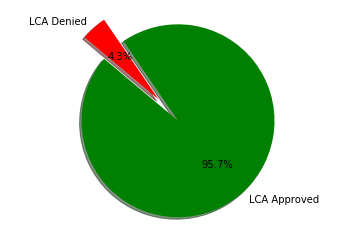

In [11]:
# Transform data into a Pie Chart
labels = 'LCA Approved', 'LCA Denied'
sizes = [A_RATE, D_RATE]
colors = ['green', 'red']
explode = (0.2, .1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Okay, so the LCA step of the H1B process is easy to get through. The bottleneck must come from DHS and the USCIS adjudication process. 

So what other info can we take from this LCA dataset? Since it contains info regarding PWDs and Job Titles we can answer some basic exploratory questions such as: what companies apply for these visas? what types of jobs are applicants on these visa doing?  

### What are the top 10 occupations for certified LCAs in 2018?

In [12]:
# Group, count, and sort to list Top 10 job titles of certified cases 
top_10_occupation = certified_LCA.groupby('SOC_NAME').size().reset_index(name='COUNT').sort_values(by='COUNT', ascending=False)
top_10_occupation[:10]

,SOC_NAME,COUNT
724,"SOFTWARE DEVELOPERS, APPLICATIONS",177669
177,"COMPUTER OCCUPATIONS, ALL OTHER",56123
201,COMPUTER SYSTEMS ANALYSTS,55260
737,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",25243
185,COMPUTER PROGRAMMERS,24698
199,COMPUTER SYSTEMS ANALYST,13204
569,OPERATIONS RESEARCH ANALYSTS,12007
462,MANAGEMENT ANALYSTS,11432
499,MECHANICAL ENGINEERS,9265
238,DATABASE ADMINISTRATORS,9206


It is not shocking that most of these jobs are computer science related. There is a high cost associated (both time and money) with filing these applications therefore the positions they are filling must be worth the cost. Computer Scientsts are in high demand so that makes intutive sense. 

### Which companies sponsored the most Data Scientists?

In [13]:
# Subset, group, size, and sort
ds_gb_company = LCA[LCA.JOB_TITLE == 'DATA SCIENTIST'].groupby('EMPLOYER_NAME').size().reset_index(name='COUNT')
ds_gb_company = ds_gb_company.sort_values(by='COUNT', ascending=False)
ds_gb_company.head()

# Top 10 companies requested data scientists
ds_gb_company[:10]

,EMPLOYER_NAME,COUNT
314,"FACEBOOK, INC.",132
529,MICROSOFT CORPORATION,80
404,IBM CORPORATION,68
861,"UBER TECHNOLOGIES, INC.",58
237,CYBER INFOTECH LLC,30
42,"AIRBNB, INC.",29
486,LINKEDIN CORPORATION,24
905,"WAL-MART ASSOCIATES, INC.",21
496,"LYFT, INC.",21
708,"SAP LABS, LLC",20


So Data Scientists are in demand at many prestigous tech/SaS companies. 

###  How much more does a Data Scientist get paid than your average 2018 LCA applicant? 

In [14]:
# Compute the mean salary for all applications
all_positions_salary = LCA['PREVAILING_WAGE'].mean()
print('The average Prevailing Wage Determination for 2018 LCA applicants is ${:,.0f}'.format(all_positions_salary))

The average Prevailing Wage Determination for 2018 LCA applicants is $88,119


In [15]:
# Compute the mean salary for data scientist applications
ds_salary = LCA['PREVAILING_WAGE'][LCA.JOB_TITLE == 'DATA SCIENTIST'].mean()
print('The average Prevailing Wage Determination for a 2018 data scientist is ${:,.0f}'.format(ds_salary))

The average Prevailing Wage Determination for a 2018 data scientist is $92,497


In [16]:
# Compute the difference and percent difference in salary
salary_diff = ds_salary - all_positions_salary
salary_percent_diff = (salary_diff / all_positions_salary) *100
print('Data Scientists earn on average ${:,.0f} ({:.1f}%) more than the average of all H-1B visa applicants'.format(salary_diff, salary_percent_diff))

Data Scientists earn on average $4,379 (5.0%) more than the average of all H-1B visa applicants


Since so many of the positions in the data set are computer related the average wage is already skewed high but it is interesting to quantify the worth some data science knowledge.

### What month has the highest instance of LCA denials?

In [17]:
# Filter just the dates of denied visas
denied_LCA = LCA[['CASE_NUMBER','CASE_SUBMITTED', 'DECISION_DATE']][LCA.CASE_STATUS == 'DENIED']

In [18]:
# Extract the month from both dates
denied_LCA['Month_submitted'] =  pd.DatetimeIndex( denied_LCA.CASE_SUBMITTED).month
denied_LCA['Month_decision'] =  pd.DatetimeIndex( denied_LCA.DECISION_DATE).month

<function matplotlib.pyplot.show(*args, **kw)>

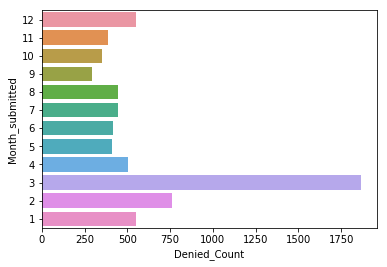

In [19]:
# Group by month of submitted dates
denied_LCA_gr_by_month_sub = denied_LCA.groupby('Month_submitted').size().reset_index(name='Denied_Count')
denied_LCA_gr_by_month_sub = denied_LCA_gr_by_month_sub.sort_values(by='Month_submitted', ascending=False)  

# Plot visas denied grouped by month submitted dates
sns.barplot(x='Denied_Count', y='Month_submitted', data=denied_LCA_gr_by_month_sub, 
            order=denied_LCA_gr_by_month_sub.Month_submitted, orient='h')
plt.show

Recommended practice is to file the Labor Condition Application three to six months prior to the H1B filing deadline. The trend of increased denials in March, immediately preceding the H-1B filing deadline, could indicate careless and rushed completion of application paperwork. For example, there were applications in the dataset with prevailing wage listed at $0--a careless mistake which would lead to an immediate denial of the LCA. 

# 2012-2019 USCIS Data Explorations
1. Visualization of trends in approval and denial rates over time.
2. Visualization of trends in absolute number of petitions submitted over time.

## Loading in the data
Source: https://www.uscis.gov/h-1b-data-hub 

In [20]:
df_2012 = pd.read_csv('h1b_datahubexport-2012.csv', thousands=',')
df_2013 = pd.read_csv('h1b_datahubexport-2013.csv', thousands=',')
df_2014 = pd.read_csv('h1b_datahubexport-2014.csv', thousands=',')
df_2015 = pd.read_csv('h1b_datahubexport-2015.csv', thousands=',')
df_2016 = pd.read_csv('h1b_datahubexport-2016.csv', thousands=',')
df_2017 = pd.read_csv('h1b_datahubexport-2017.csv', thousands=',')
df_2018 = pd.read_csv('h1b_datahubexport-2018.csv', thousands=',')
df_2019 = pd.read_csv('h1b_datahubexport-2019.csv', thousands=',')

In [21]:
df_2012.head()

,Fiscal Year,Employer,Initial Approvals,Initial Denials,Continuing Approvals,Continuing Denials,NAICS,Tax ID,State,City,ZIP
0,2012,SHRUSHTI INC,0,1,0,0,44,NaN,AL,GEORGIANA,36033.0
1,2012,GADSDEN ELEMENTARY SCH DIST 32,1,0,0,0,61,NaN,AZ,SAN LUIS,85349.0
2,2012,TIPD LLC,0,0,1,0,54,NaN,AZ,TUCSON,85750.0
3,2012,KEY POWER USA INC,1,0,0,0,99,NaN,CA,CITY OF INDUSTRY,91748.0
4,2012,ROBERTMARRIOTT MEDICAL CORP D/B/A,0,0,1,0,62,NaN,CA,EL SEGUNDO,90245.0


## Create Summary Dataframe with Annual Approval/Denial Data

In [22]:
#total number of initial approvals/denials and continuing approvals/denials in 2012
IA12 = df_2012['Initial Approvals'].sum()
ID12 = df_2012['Initial Denials'].sum()
CA12 = df_2012['Continuing Approvals'].sum()
CD12 = df_2012['Continuing Denials'].sum()

#sums of initial, continuing, and total petitions in 2012
I_12 = IA12 + ID12
C_12 = CA12 + CD12
total_12 = IA12 + ID12 + CA12 + CD12

In [23]:
#total number of initial approvals/denials and continuing approvals/denials in 2013
IA13 = df_2013['Initial Approvals'].sum()
ID13 = df_2013['Initial Denials'].sum()
CA13 = df_2013['Continuing Approvals'].sum()
CD13 = df_2013['Continuing Denials'].sum()

#sums of initial, continuing, and total petitions in 2013
I_13 = IA13 + ID13
C_13 = CA13 + CD13
total_13 = IA13 + ID13 + CA13 + CD13

In [24]:
#total number of initial approvals/denials and continuing approvals/denials in 2014
IA14 = df_2014['Initial Approvals'].sum()
ID14 = df_2014['Initial Denials'].sum()
CA14 = df_2014['Continuing Approvals'].sum()
CD14 = df_2014['Continuing Denials'].sum()

#sums of initial, continuing, and total petitions in 2014
I_14 = IA14 + ID14
C_14 = CA14 + CD14
total_14 = IA14 + ID14 + CA14 + CD14

In [25]:
#total number of initial approvals/denials and continuing approvals/denials in 2015
IA15 = df_2015['Initial Approvals'].sum()
ID15 = df_2015['Initial Denials'].sum()
CA15 = df_2015['Continuing Approvals'].sum()
CD15 = df_2015['Continuing Denials'].sum()

#sums of initial, continuing, and total petitions in 2015
I_15 = IA15 + ID15
C_15 = CA15 + CD15
total_15 = IA15 + ID15 + CA15 + CD15

In [26]:
#total number of initial approvals/denials and continuing approvals/denials in 2016
IA16 = df_2016['Initial Approvals'].sum()
ID16 = df_2016['Initial Denials'].sum()
CA16 = df_2016['Continuing Approvals'].sum()
CD16 = df_2016['Continuing Denials'].sum()

#sums of initial, continuing, and total petitions in 2016
I_16 = IA16 + ID16
C_16 = CA16 + CD16
total_16 = IA16 + ID16 + CA16 + CD16

In [27]:
#total number of initial approvals/denials and continuing approvals/denials in 2017
IA17 = df_2017['Initial Approvals'].sum()
ID17 = df_2017['Initial Denials'].sum()
CA17 = df_2017['Continuing Approvals'].sum()
CD17 = df_2017['Continuing Denials'].sum()

#sums of initial, continuing, and total petitions in 2017
I_17 = IA17 + ID17
C_17 = CA17 + CD17
total_17 = IA17 + ID17 + CA17 + CD17

In [28]:
#total number of initial approvals/denials and continuing approvals/denials in 2018
IA18 = df_2018['Initial Approvals'].sum()
ID18 = df_2018['Initial Denials'].sum()
CA18 = df_2018['Continuing Approvals'].sum()
CD18 = df_2018['Continuing Denials'].sum()

#sums of initial, continuing, and total petitions in 2018
I_18 = IA18 + ID18
C_18 = CA18 + CD18
total_18 = IA18 + ID18 + CA18 + CD18

In [29]:
#total number of initial approvals/denials and continuing approvals/denials in 2019
IA19 = df_2019['Initial Approvals'].sum()
ID19 = df_2019['Initial Denials'].sum()
CA19 = df_2019['Continuing Approvals'].sum()
CD19 = df_2019['Continuing Denials'].sum()

#sums of initial, continuing, and total petitions in 2019
I_19 = IA19 + ID19
C_19 = CA19 + CD19
total_19 = IA19 + ID19 + CA19 + CD19

In [30]:
decisions_data = {
            'Year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],        
            'Total':[total_12, total_13, total_14, total_15, total_16, total_17, total_18, total_19],          
            'All_Initial': [I_12, I_13, I_14, I_15, I_16, I_17, I_18, I_19],
            'All_Continuing': [C_12, C_13, C_14, C_15, C_16, C_17, C_18, C_19],  
            'Initial_Approvals': [IA12, IA13, IA14, IA15, IA16, IA17, IA18, IA19], 
            'Initial_Denials': [ID12, ID13, ID14, ID15, ID16, ID17, ID18, ID19],
            'Continuing_Approvals': [CA12, CA13, CA14, CA15, CA16, CA17, CA18, CA19],
            'Continuing_Denials': [CD12, CD13, CD14, CD15, CD16, CD17, CD18, CD19]  
           }
df = pd.DataFrame(decisions_data)
df.set_index('Year', inplace=True)
df

,Total,All_Initial,All_Continuing,Initial_Approvals,Initial_Denials,Continuing_Approvals,Continuing_Denials
Year,,,,,,,
2012,281261,148210,133051,140809,7401,129023,4028
2013,309422,140332,169090,130736,9596,164538,4552
2014,349571,141261,208310,130616,10645,202190,6120
2015,301575,119490,182085,111846,7644,176656,5429
2016,380244,116387,263857,105092,11295,252120,11737
2017,403251,110684,292567,96166,14518,277229,15338
2018,396307,116070,280237,87889,28181,247072,33165
2019,101685,48711,52974,33366,15345,43268,9706


#### Something seems fishy... 

In the above dataframe, the number of total H-1B petitions received each year is inconsistent with the numbers reported in a 2017 USCIS report. 

The total petitions recorded in that report are displayed in the dataframe below:

Source: https://www.uscis.gov/sites/default/files/USCIS/Resources/Reports%20and%20Studies/Immigration%20Forms%20Data/BAHA/h-1b-2007-2017-trend-tables.pdf

Please note that in the following explorations, we operate under the assumption that the dataset provided on the Employer Data Hub is correct.

In [31]:
USCIS_report = {
            'Year':[2012, 2013, 2014, 2015, 2016, 2017],
            'Total from 2017 USCIS Report':[308242, 299690, 325971, 368852, 399349, 336107],
            'Total from USCIS Data Hub':[total_12, total_13, total_14, total_15, total_16, total_17]
           }
df_alt = pd.DataFrame(USCIS_report)
df_alt.set_index('Year', inplace=True)
df_alt

,Total from 2017 USCIS Report,Total from USCIS Data Hub
Year,,
2012,308242,281261
2013,299690,309422
2014,325971,349571
2015,368852,301575
2016,399349,380244
2017,336107,403251


The discrepancies here are puzzling, given that all the data is coming from the same organization. Neither total is consistently higher than the other, but they are consistently different. Perhaps there are errors in the USCIS H-1B Employer Data Hub - after all, it was launched less than two months ago. 

Please note that in the following interpretations, we operate under the assumption that the dataset provided on the  Employer Data Hub is correct. 

## Visualize trends in approval/denial rates over time
### Percent Stacked Barplot
REMINDER: 2019 data includes only the first quarter of fiscal year 2019.

In [32]:
# from raw value to percentage
# source: https://python-graph-gallery.com/13-percent-stacked-barplot/
totals = [i+j+k+l for i,j,k,l in zip(df['Initial_Approvals'], df['Initial_Denials'], df['Continuing_Approvals'], df['Continuing_Denials'])]
dgreenbars = [i / j * 100 for i,j in zip(df['Initial_Approvals'], totals)]
redbars = [i / j * 100 for i,j in zip(df['Initial_Denials'], totals)]
lgreenbars = [i / j * 100 for i,j in zip(df['Continuing_Approvals'], totals)]
pinkbars = [i / j * 100 for i,j in zip(df['Continuing_Denials'], totals)]

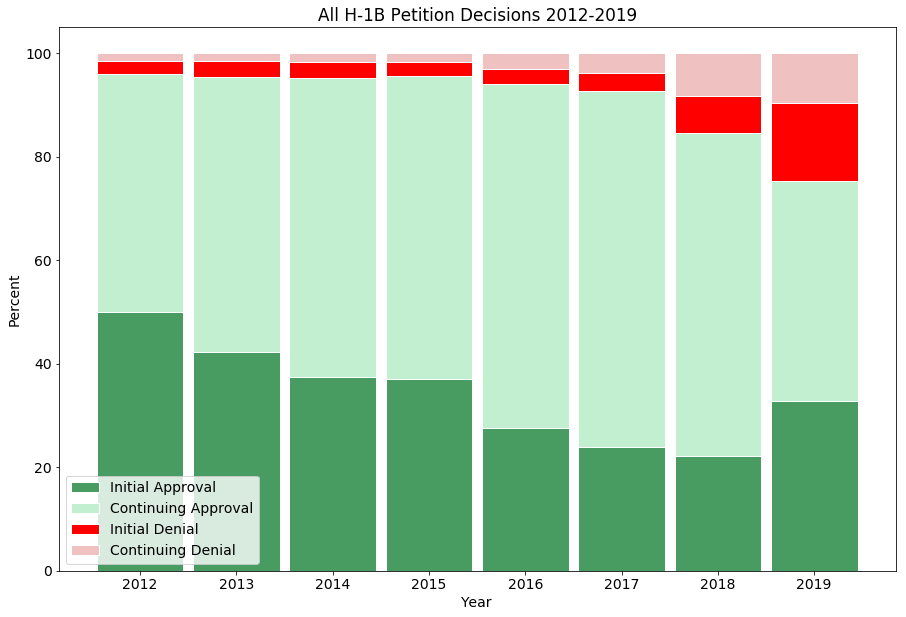

In [33]:
# create percent stacked barplot
# source: https://python-graph-gallery.com/13-percent-stacked-barplot/
# source for font code: 
# https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc

r =[0,1,2,3,4,5,6,7]
years = ('2012','2013','2014','2015','2016','2017','2018','2019')

#formatting
barWidth = 0.9
f1 = plt.figure(figsize=(15,10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}
rc('font', **font)

# Create dark green initial approval bars
p1 = plt.bar(r, dgreenbars, color='#489c61', edgecolor='white', width=barWidth)
# Create light green continuing approval bars
p2 = plt.bar(r, lgreenbars, bottom=dgreenbars, color='#c1efcf', edgecolor='white', width=barWidth)
# Create red initial denial bars
p3 = plt.bar(r, redbars, bottom=[i+j for i,j in zip(dgreenbars, lgreenbars)], color='#ff0000', edgecolor='white', width=barWidth)
# Create pink continuing denial bars
p4 = plt.bar(r, pinkbars, bottom=[i+j+k for i,j,k in zip(dgreenbars, lgreenbars, redbars)], color='#efc1c1', edgecolor='white', width=barWidth)

plt.xticks(r, years)
plt.xlabel("Year")
plt.ylabel("Percent")
plt.title("All H-1B Petition Decisions 2012-2019")

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Initial Approval', 'Continuing Approval','Initial Denial', 'Continuing Denial'))

plt.show()

#### What is going on here?
Since 2012, initial approval rates have steadily decreased. Since 2016, both initial and continuing denial rates have increased. The pattern of continuing approval rates is less straightforward. It appears that continuing approval rates have decreased since 2017.

These patterns do not necessarily imply a policy change or increased stringency on the part of the USCIS. Does an increase in the number of applicants explain the reduced rates of approval? 

The next few figures begin to address this question by visualizing _absolute_ numbers instead of rates. If we observe constant or decreasing numbers of H-1B petitions, we will know that increased applicants cannot explain the trends above.

## Visualize absolute number of H-1B petitions; 2012-2018
### Multiple Line Graph
2019 omitted because dataset includes only the first quarter of FY 2019.

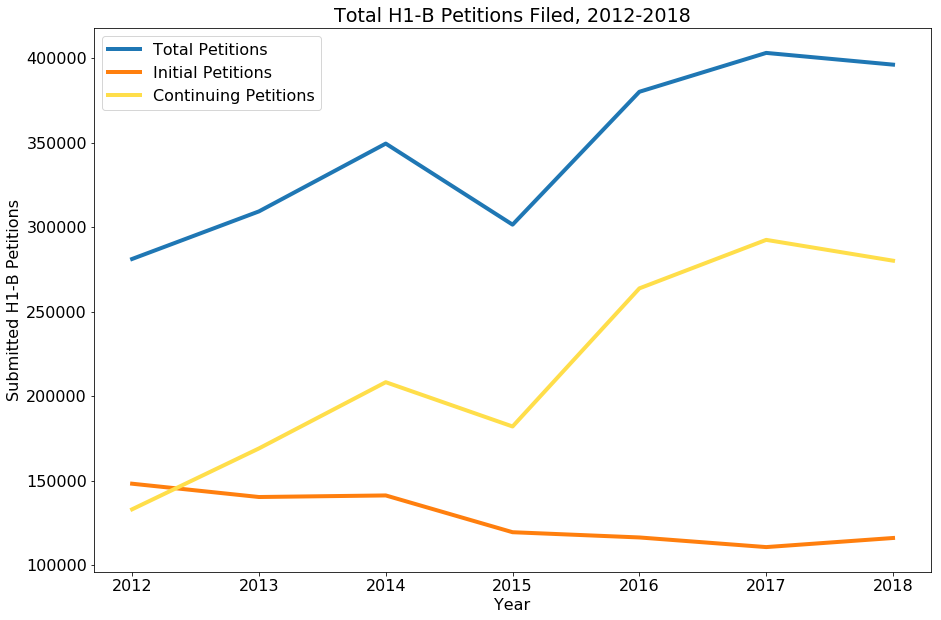

In [38]:
# source: https://www.pythonprogramming.in/matplotlib/plot-line-graph-with-multiple-lines-with-label-and-legend.html

initial_1218 = [I_12, I_13, I_14, I_15, I_16, I_17, I_18]
continuing_1218 = [C_12, C_13, C_14, C_15, C_16, C_17, C_18]
totals_1218 = [total_12, total_13, total_14, total_15, total_16, total_17, total_18]


f1 = plt.figure(figsize=(15,10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
rc('font', **font)


plt.plot(totals_1218, label='Total Petitions',linewidth = 4)
plt.plot(initial_1218, label='Initial Petitions',linewidth = 4)
plt.plot(continuing_1218, label='Continuing Petitions', color='#FFDE4A', linewidth = 4)


# Add labels and title
plt.title("Total H1-B Petitions Filed, 2012-2018")
plt.xlabel("Year")
plt.ylabel("Submitted H1-B Petitions")
plt.xticks(ticks, years)

plt.legend()
plt.show()

#### What is going on here?

Over the past few years, the number of continuing H-1B petitions and the number of _overall_ petitions have increased. Perhaps, then, the recent dip in continuing and overall approval rates can be explained by an increase in continuing applicants.

The number of _initial_ H-1B petitions filed, however, has declined in the last decade. The fact that we still saw a decrease in initial approval rates indicates that some other factor may be driving the trend.

## Visualize absolute number of H-1B petitions by outcome type; 2012-2018
### Multiple Line Graph
2019 omitted because dataset includes only the first quarter of FY 2019.

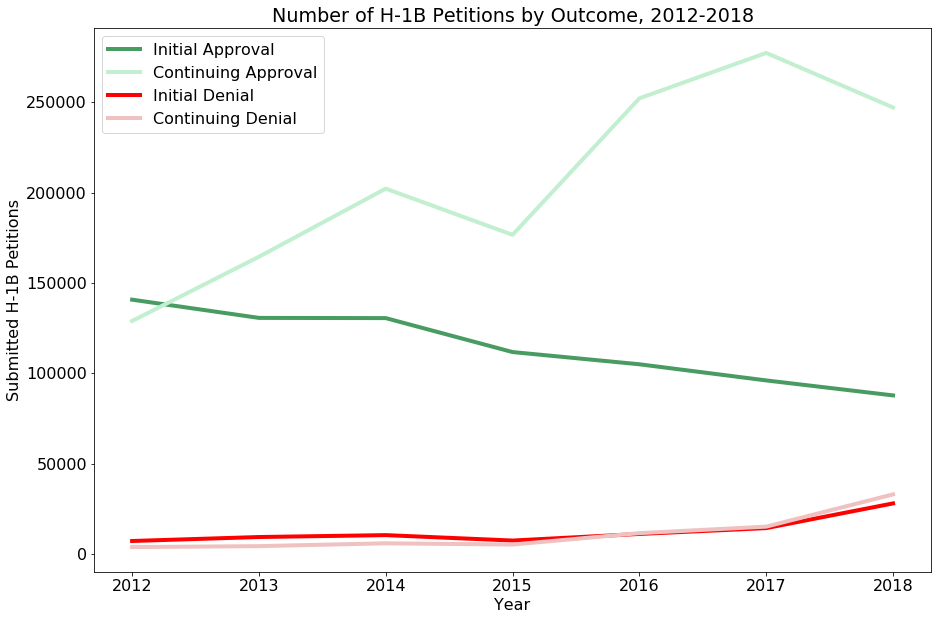

In [36]:
# source: https://www.pythonprogramming.in/matplotlib/plot-line-graph-with-multiple-lines-with-label-and-legend.html

f1 = plt.figure(figsize=(15,10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
rc('font', **font)

ticks = [0,1,2,3,4,5,6]
years = ('2012', '2013', '2014', '2015', '2016', '2017', '2018')

IA = [IA12, IA13, IA14, IA15, IA16, IA17, IA18]
ID = [ID12, ID13, ID14, ID15, ID16, ID17, ID18]
CA = [CA12, CA13, CA14, CA15, CA16, CA17, CA18]
CD = [CD12, CD13, CD14, CD15, CD16, CD17, CD18]

#Plot a line graph
plt.plot(IA, color='#489c61', label='Initial Approval', linewidth = 4)
plt.plot(CA, color='#c1efcf', label='Continuing Approval', linewidth = 4)
plt.plot(ID, color='#ff0000', label='Initial Denial', linewidth = 4)
plt.plot(CD, color='#efc1c1', label='Continuing Denial', linewidth = 4)
 
# Add labels and title
plt.title("Number of H-1B Petitions by Outcome, 2012-2018")
plt.xlabel("Year")
plt.ylabel("Submitted H-1B Petitions")
plt.xticks(ticks, years)
 
plt.legend()
plt.show()

#### What is going on here?

When we compare this line graph to the percent stacked bar graph above, we glean a few insights.

* As denial rates have increased, so has the absolute number of people receiving denials of both types
* The number of people receiving approval for continuing H-1B visas in the past several years has greatly increased. This trend was not evident on the stacked bar plot, and it is an interesting one. It suggests that the USCIS has actually become more generous in approving continuing petitions over time.
* As initial approval rates have decreased, so has the absolute number of people receiving initial approvals. This is interesting, as it rules out the possibility that reduced relative rates of initial approvals over time can be explained simply by a growing applicant pool. 

## Future Directions/Analyses

Public discourse surrounding immigration reform is often undercut by the fact that so few people fully understand the complex system.  We have broken down the data for a single and very specific visa class, even beginning to extrapolate informed opinions on domestic policy from this data is very difficult. 

Future researchers could run a multinomial logistic regression to identify the extent to which the year explains the change in approvals and denials over time. Has the overall denial or approval rate changed significanty since Trump's 2017 "Buy American, Hire American" executive order?

Future research should also widen the scope of this project to examine other factors that may affect denial rates over time. For example, research should take into account global immigration patterns, national rates of unemployment/layoffs, and public sentiment toward immigrants. Future research should also examine the NAFP’s 2017 claim that “USCIS raised the standard of proof for approving an H-1B petition without any new law or regulation that would permit the agency to do so legally, according to attorney and employers.” Is this actually the case?

Another future direction would involve combining the 2011-2018 LCA databases into one and running the same descriptive statistics on the 2011-2018 data to look for changes in hiring patterns over time given the continuing demand for computer programmers. A deeper look into the 2011-2016 prevailing wage determinations and employer information could identify companies who file excessive numbers of LCAs and could be used to verify the claim that there is abuse of the system. 

Lastly, we started this project with the hope of building a predictive model (based on the LCA database) in which an applicant could plug in their job stats into the model and get back out a prediction that their application would get through the LCA step. Since the LCA dataset is so imbalanced (many more approvals than denials) it is a challenging machine learning problem. We attempted to create a model based on this example --https://www.datacamp.com/community/tutorials/predicting-H-1B-visa-status-python -- but with given the size of the 2018 dataset there was not enough memory on our server to run it. In retrospect, a more interesting machine learning problem would involve modeling BOTH the LCA step of the process and the USCIS lottery/adjudication step.  

## Contributing

**The following resources were helpful for understanding the H-1B application process and current events surrounding this issue:**
* Infographic: https://www.immi-usa.com/h1b-application-process-step-by-step-guide/
* News articles about President Trump’s 2020 legal immigration goals: 
    * https://www.cnn.com/2019/05/16/politics/merit-based-immigration-explainer/index.html
    * https://www.nbcnews.com/politics/white-house/trump-plays-middle-2020-legal-immigration-focus-n1006671
* Concise explanation of Labor Conditions Approval: https://www.upcounsel.com/what-is-a-lca
* Legal definitions of ‘initial’ and ‘continuing’: https://www.uscis.gov/tools/reports-studies/understanding-our-h-1b-employer-data-hub
* NFAP Policy Brief: https://nfap.com/wp-content/uploads/2019/04/H-1B-Denial-Rates-Past-and-Present.NFAP-Policy-Brief.April-2019.pdf
* USCIS 2017 Report: https://www.uscis.gov/sites/default/files/USCIS/Resources/Reports%20and%20Studies/Immigration%20Forms%20Data/BAHA/h-1b-2007-2017-trend-tables.pdf


**Links to source code are embedded throughout. In our data explorations, we used code from:**
* https://python-graph-gallery.com/13-percent-stacked-barplot/
* https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc
* https://www.pythonprogramming.in/matplotlib/plot-line-graph-with-multiple-lines-with-label-and-legend.html